#📌 Extracción

In [2]:
import requests
import pandas as pd
url ='https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
datos = response.json()

data = pd.DataFrame(datos)
data.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformación

In [4]:
from pandas import json_normalize

In [5]:
data_normalizada = pd.concat([
    data[["customerID", "Churn"]],
    json_normalize(data["customer"]),
    json_normalize(data["phone"]),
    json_normalize(data["internet"]),
    json_normalize(data["account"])], axis=1)

data_normalizada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [6]:
data_normalizada.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [7]:
data_normalizada['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [8]:
# Filtrar SOLO las filas problemáticas, no todas
data_normalizada = data_normalizada[data_normalizada['Churn'].notna() & (data_normalizada['Churn'] != '')]
# Conversión segura a booleano
data_normalizada['Churn'] = data_normalizada['Churn'].str.strip().map({
    'Yes': True,
    'No': False
})

# Verificación
print(data_normalizada['Churn'].value_counts(dropna=False))
data_normalizada['Churn'].unique()

Churn
False    5174
True     1869
Name: count, dtype: int64


array([False,  True])

In [9]:
# traducir columnas

dicc = {'customerID': 'ID_CLiente',
'Churn': 'Evade_Servicio',
'gender': 'Genero',
'SeniorCitizen': 'Adulto_Mayor',
'Partner': 'Pareja',
'Dependents': 'Dependientes',
'tenure': 'Meses_Contrato',
'PhoneService': 'Servicio_Telefonico',
'MultipleLines': 'Multi_lineas',
'InternetService': 'Servicio_Internet',
'OnlineSecurity': 'Seguridad_en_Linea',
'OnlineBackup': 'Respaldo_en_Linea',
'DeviceProtection': 'Proteccion_Dispositivo',
'TechSupport': 'Soporte_Tecnico',
'StreamingTV': 'Suscripcion_TV',
'StreamingMovies': 'Streaming_Peliculas',
'Contract': 'Contrato',
'PaperlessBilling': 'Factura_en_Linea',
'PaymentMethod': 'Forma_de_Pago',
'Charges.Monthly': 'Cargos_Mensuales',
'Charges.Total': 'Cargos_Totales'}
data_normalizada = data_normalizada.rename(columns=dicc)
data_normalizada.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_CLiente              7043 non-null   object 
 1   Evade_Servicio          7043 non-null   bool   
 2   Genero                  7043 non-null   object 
 3   Adulto_Mayor            7043 non-null   int64  
 4   Pareja                  7043 non-null   object 
 5   Dependientes            7043 non-null   object 
 6   Meses_Contrato          7043 non-null   int64  
 7   Servicio_Telefonico     7043 non-null   object 
 8   Multi_lineas            7043 non-null   object 
 9   Servicio_Internet       7043 non-null   object 
 10  Seguridad_en_Linea      7043 non-null   object 
 11  Respaldo_en_Linea       7043 non-null   object 
 12  Proteccion_Dispositivo  7043 non-null   object 
 13  Soporte_Tecnico         7043 non-null   object 
 14  Suscripcion_TV          7043 non-null   objec

In [10]:
# Columnas a convertir a booleano
columnas_a_convertir = [
    'Adulto_Mayor',
    'Pareja',
    'Dependientes',
    'Servicio_Telefonico',
    'Factura_en_Linea'
]

# Diccionario de mapeo para conversión
mapeo_booleanos = {
    1: True,
    0: False,
    'Yes': True,
    'No': False
}

for columna in columnas_a_convertir:
    # Verificamos si la columna existe en el DataFrame
    if columna in data_normalizada.columns:
        # Convertimos a booleano usando el mapeo
        data_normalizada[columna] = data_normalizada[columna].map(mapeo_booleanos)

In [11]:
data_normalizada.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_CLiente              7043 non-null   object 
 1   Evade_Servicio          7043 non-null   bool   
 2   Genero                  7043 non-null   object 
 3   Adulto_Mayor            7043 non-null   bool   
 4   Pareja                  7043 non-null   bool   
 5   Dependientes            7043 non-null   bool   
 6   Meses_Contrato          7043 non-null   int64  
 7   Servicio_Telefonico     7043 non-null   bool   
 8   Multi_lineas            7043 non-null   object 
 9   Servicio_Internet       7043 non-null   object 
 10  Seguridad_en_Linea      7043 non-null   object 
 11  Respaldo_en_Linea       7043 non-null   object 
 12  Proteccion_Dispositivo  7043 non-null   object 
 13  Soporte_Tecnico         7043 non-null   object 
 14  Suscripcion_TV          7043 non-null   objec

In [12]:
data_normalizada['Genero'] = data_normalizada['Genero'].replace({
    'Female': 'Femenino',
    'Male': 'Masculino'
})

#📊 Carga y análisis

### CAMPOS DE DATOS CATEGÓRICOS

In [13]:

# Filtrar los datos en función de Evade_Servicio
evade_true = data_normalizada[data_normalizada['Evade_Servicio'] == True]
evade_false = data_normalizada[data_normalizada['Evade_Servicio'] == False]

# Lista de columnas categóricas
categorical_columns = [
    'Genero', 'Adulto_Mayor', 'Pareja', 'Dependientes',
    'Servicio_Telefonico', 'Multi_lineas', 'Servicio_Internet',
    'Seguridad_en_Linea', 'Respaldo_en_Linea', 'Proteccion_Dispositivo',
    'Soporte_Tecnico', 'Suscripcion_TV', 'Streaming_Peliculas',
    'Contrato', 'Factura_en_Linea', 'Forma_de_Pago'
]

# Comparación para variables categóricas
for col in categorical_columns:
    print(f"\n--- {col} ---")
    print("Proporción en Evade_Servicio = True:")
    print(evade_true[col].value_counts(normalize=True))
    print("\nProporción en Evade_Servicio = False:")
    print(evade_false[col].value_counts(normalize=True))


--- Genero ---
Proporción en Evade_Servicio = True:
Genero
Femenino     0.502408
Masculino    0.497592
Name: proportion, dtype: float64

Proporción en Evade_Servicio = False:
Genero
Masculino    0.507344
Femenino     0.492656
Name: proportion, dtype: float64

--- Adulto_Mayor ---
Proporción en Evade_Servicio = True:
Adulto_Mayor
False    0.745318
True     0.254682
Name: proportion, dtype: float64

Proporción en Evade_Servicio = False:
Adulto_Mayor
False    0.871279
True     0.128721
Name: proportion, dtype: float64

--- Pareja ---
Proporción en Evade_Servicio = True:
Pareja
False    0.642055
True     0.357945
Name: proportion, dtype: float64

Proporción en Evade_Servicio = False:
Pareja
True     0.528218
False    0.471782
Name: proportion, dtype: float64

--- Dependientes ---
Proporción en Evade_Servicio = True:
Dependientes
False    0.825575
True     0.174425
Name: proportion, dtype: float64

Proporción en Evade_Servicio = False:
Dependientes
False    0.655199
True     0.344801
Name:

In [14]:
tabla_porcentaje = pd.crosstab(
    index=data_normalizada['Adulto_Mayor'],
    columns=data_normalizada['Evade_Servicio'],
    normalize='index'  # Porcentajes por fila
).mul(100).round(2)

print("\nEvasión vs Adulto_Mayor:")
print(tabla_porcentaje)


Evasión vs Adulto_Mayor:
Evade_Servicio  False  True 
Adulto_Mayor                
False           76.39  23.61
True            58.32  41.68


In [15]:
tabla_porcentaje = pd.crosstab(
    index=data_normalizada['Pareja'],
    columns=data_normalizada['Evade_Servicio'],
    normalize='index'  # Porcentajes por fila
).mul(100).round(2)

print("\nEvasión vs Pareja:")
print(tabla_porcentaje)


Evasión vs Pareja:
Evade_Servicio  False  True 
Pareja                      
False           67.04  32.96
True            80.34  19.66


In [16]:
tabla_porcentaje = pd.crosstab(
    index=data_normalizada['Dependientes'],
    columns=data_normalizada['Evade_Servicio'],
    normalize='index'  # Porcentajes por fila
).mul(100).round(2)

print("\nEvasión vs Dependientes:")
print(tabla_porcentaje)


Evasión vs Dependientes:
Evade_Servicio  False  True 
Dependientes                
False           68.72  31.28
True            84.55  15.45


In [17]:
tabla_porcentaje = pd.crosstab(
    index=data_normalizada['Servicio_Telefonico'],
    columns=data_normalizada['Evade_Servicio'],
    normalize='index'  # Porcentajes por fila
).mul(100).round(2)

print("\nEvasión vs Servicio_Telefonico:")
print(tabla_porcentaje)


Evasión vs Servicio_Telefonico:
Evade_Servicio       False  True 
Servicio_Telefonico              
False                75.07  24.93
True                 73.29  26.71


In [18]:
tabla_porcentaje = pd.crosstab(
    index=data_normalizada['Multi_lineas'],
    columns=data_normalizada['Evade_Servicio'],
    normalize='index'  # Porcentajes por fila
).mul(100).round(2)

print("\nEvasión vs Multi_lineas:")
print(tabla_porcentaje)


Evasión vs Multi_lineas:
Evade_Servicio    False  True 
Multi_lineas                  
No                74.96  25.04
No phone service  75.07  24.93
Yes               71.39  28.61


In [19]:
tabla_porcentaje = pd.crosstab(
    index=data_normalizada['Servicio_Internet'],
    columns=data_normalizada['Evade_Servicio'],
    normalize='index'  # Porcentajes por fila
).mul(100).round(2)

print("\nEvasión vs Servicio_Internet:")
print(tabla_porcentaje)


Evasión vs Servicio_Internet:
Evade_Servicio     False  True 
Servicio_Internet              
DSL                81.04  18.96
Fiber optic        58.11  41.89
No                 92.60   7.40


In [20]:
tabla_porcentaje = pd.crosstab(
    index=data_normalizada['Seguridad_en_Linea'],
    columns=data_normalizada['Evade_Servicio'],
    normalize='index'  # Porcentajes por fila
).mul(100).round(2)

print("\nEvasión vs Seguridad_en_Linea:")
print(tabla_porcentaje)


Evasión vs Seguridad_en_Linea:
Evade_Servicio       False  True 
Seguridad_en_Linea               
No                   58.23  41.77
No internet service  92.60   7.40
Yes                  85.39  14.61


In [21]:
tabla_porcentaje = pd.crosstab(
    index=data_normalizada['Respaldo_en_Linea'],
    columns=data_normalizada['Evade_Servicio'],
    normalize='index'  # Porcentajes por fila
).mul(100).round(2)

print("\nEvasión vs Respaldo_en_Linea:")
print(tabla_porcentaje)


Evasión vs Respaldo_en_Linea:
Evade_Servicio       False  True 
Respaldo_en_Linea                
No                   60.07  39.93
No internet service  92.60   7.40
Yes                  78.47  21.53


In [22]:
tabla_porcentaje = pd.crosstab(
    index=data_normalizada['Proteccion_Dispositivo'],
    columns=data_normalizada['Evade_Servicio'],
    normalize='index'  # Porcentajes por fila
).mul(100).round(2)

print("\nEvasión vs Proteccion_Dispositivo:")
print(tabla_porcentaje)



Evasión vs Proteccion_Dispositivo:
Evade_Servicio          False  True 
Proteccion_Dispositivo              
No                      60.87  39.13
No internet service     92.60   7.40
Yes                     77.50  22.50


In [23]:
tabla_porcentaje = pd.crosstab(
    index=data_normalizada['Soporte_Tecnico'],
    columns=data_normalizada['Evade_Servicio'],
    normalize='index'  # Porcentajes por fila
).mul(100).round(2)

print("\nEvasión vs Soporte_Técnico:")
print(tabla_porcentaje)


Evasión vs Soporte_Técnico:
Evade_Servicio       False  True 
Soporte_Tecnico                  
No                   58.36  41.64
No internet service  92.60   7.40
Yes                  84.83  15.17


In [24]:
tabla_porcentaje = pd.crosstab(
    index=data_normalizada['Suscripcion_TV'],
    columns=data_normalizada['Evade_Servicio'],
    normalize='index'  # Porcentajes por fila
).mul(100).round(2)

print("\nEvasión vs Suscripcion_TV:")
print(tabla_porcentaje)


Evasión vs Suscripcion_TV:
Evade_Servicio       False  True 
Suscripcion_TV                   
No                   66.48  33.52
No internet service  92.60   7.40
Yes                  69.93  30.07


In [25]:
tabla_porcentaje = pd.crosstab(
    index=data_normalizada['Streaming_Peliculas'],
    columns=data_normalizada['Evade_Servicio'],
    normalize='index'  # Porcentajes por fila
).mul(100).round(2)

print("\nEvasión vs Streaming_Peliculas:")
print(tabla_porcentaje)


Evasión vs Streaming_Peliculas:
Evade_Servicio       False  True 
Streaming_Peliculas              
No                   66.32  33.68
No internet service  92.60   7.40
Yes                  70.06  29.94


In [26]:
tabla_porcentaje = pd.crosstab(
    index=data_normalizada['Contrato'],
    columns=data_normalizada['Evade_Servicio'],
    normalize='index'  # Porcentajes por fila
).mul(100).round(2)

print("\nEvasión vs Contrato:")
print(tabla_porcentaje)


Evasión vs Contrato:
Evade_Servicio  False  True 
Contrato                    
Month-to-month  57.29  42.71
One year        88.73  11.27
Two year        97.17   2.83


In [27]:
tabla_porcentaje = pd.crosstab(
    index=data_normalizada['Factura_en_Linea'],
    columns=data_normalizada['Evade_Servicio'],
    normalize='index'  # Porcentajes por fila
).mul(100).round(2)

print("\nEvasión vs Factura_en_Linea:")
print(tabla_porcentaje)


Evasión vs Factura_en_Linea:
Evade_Servicio    False  True 
Factura_en_Linea              
False             83.67  16.33
True              66.43  33.57


In [28]:
tabla_porcentaje = pd.crosstab(
    index=data_normalizada['Forma_de_Pago'],
    columns=data_normalizada['Evade_Servicio'],
    normalize='index'  # Porcentajes por fila
).mul(100).round(2)

print("\nEvasión vs Forma_de_Pago:")
print(tabla_porcentaje)



Evasión vs Forma_de_Pago:
Evade_Servicio             False  True 
Forma_de_Pago                          
Bank transfer (automatic)  83.29  16.71
Credit card (automatic)    84.76  15.24
Electronic check           54.71  45.29
Mailed check               80.89  19.11


### CARGOS MENSUALES

In [50]:
# Definir los tramos de Cargos_Mensuales
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
labels = ['0-10', '11-20', '21-30', '31,-40','41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '101-110', '111-120']

# Crear nueva columna con los tramos
data_normalizada['Tramo_Cargos_Mensuales'] = pd.cut(data_normalizada['Cargos_Mensuales'], bins=bins, labels=labels, include_lowest=True)

# Verificar los tramos creados
data_normalizada['Tramo_Cargos_Mensuales'].value_counts().sort_index()

# Comparar distribución de tramos según Evade_Servicio
pd.crosstab(data_normalizada['Tramo_Cargos_Mensuales'], data_normalizada['Evade_Servicio'], normalize='index') * 100


Evade_Servicio,False,True
Tramo_Cargos_Mensuales,,
11-20,91.158537,8.841463
21-30,89.568706,10.431294
"31,-40",71.891892,28.108108
41-50,68.112798,31.887202
51-60,79.159935,20.840065
61-70,79.335793,20.664207
71-80,60.632497,39.367503
81-90,63.754045,36.245955
91-100,62.126643,37.873357


In [54]:
#Crear una nueva columna en el dt data_normalizada llamada "Cuentas_Diarias"

data_normalizada['Cuentas_Diarias'] = data_normalizada['Cargos_Mensuales'] / 30
data_normalizada.head()

,ID_CLiente,Evade_Servicio,Genero,Adulto_Mayor,Pareja,Dependientes,Meses_Contrato,Servicio_Telefonico,Multi_lineas,Servicio_Internet,...,Soporte_Tecnico,Suscripcion_TV,Streaming_Peliculas,Contrato,Factura_en_Linea,Forma_de_Pago,Cargos_Mensuales,Cargos_Totales,Tramo_Cargos_Mensuales,Cuentas_Diarias
0,0002-ORFBO,False,Femenino,False,True,True,9,True,No,DSL,...,Yes,Yes,No,One year,True,Mailed check,65.6,593.3,61-70,2.186667
1,0003-MKNFE,False,Masculino,False,False,False,9,True,Yes,DSL,...,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.4,51-60,1.996667
2,0004-TLHLJ,True,Masculino,False,False,False,4,True,No,Fiber optic,...,No,No,No,Month-to-month,True,Electronic check,73.9,280.85,71-80,2.463333
3,0011-IGKFF,True,Masculino,True,True,False,13,True,No,Fiber optic,...,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85,91-100,3.266667
4,0013-EXCHZ,True,Femenino,True,True,False,3,True,No,Fiber optic,...,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.4,81-90,2.796667


In [64]:
# Definir los tramos de Cuentas_Diarias
bins = [0, 1, 2, 3, 4]
labels = ['0-1', '1-2', '2-3', '3-4']

# Crear nueva columna con los tramos
data_normalizada['Tramo_Cuentas_Diarias'] = pd.cut(data_normalizada['Cuentas_Diarias'], bins=bins, labels=labels, include_lowest=True)

# Verificar los tramos creados
data_normalizada['Tramo_Cuentas_Diarias'].value_counts().sort_index()

# Comparar distribución de tramos según Evade_Servicio
cancelacion_por_gasto_diario = pd.crosstab(data_normalizada['Tramo_Cuentas_Diarias'], data_normalizada['Evade_Servicio'], normalize='index') * 100
cancelacion_por_gasto_diario

Evade_Servicio,False,True
Tramo_Cuentas_Diarias,,
0-1,90.199637,9.800363
1-2,74.071146,25.928854
2-3,66.093881,33.906119
3-4,67.222542,32.777458


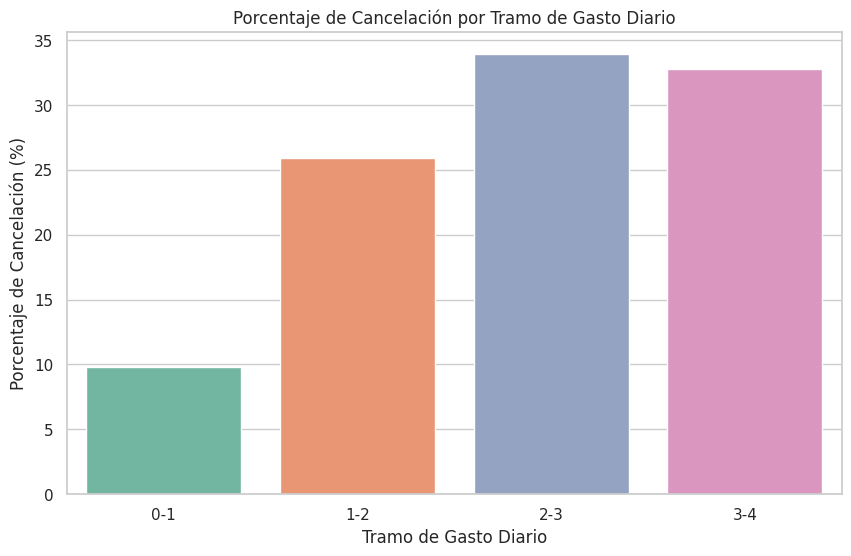

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(
    x=cancelacion_por_gasto_diario.index,
    y=cancelacion_por_gasto_diario[True],  # Porcentaje de True (evasión)
    palette='Set2'
)

plt.title('Porcentaje de Cancelación por Tramo de Gasto Diario')
plt.xlabel('Tramo de Gasto Diario')
plt.ylabel('Porcentaje de Cancelación (%)')
plt.xticks(rotation=0)
plt.show()


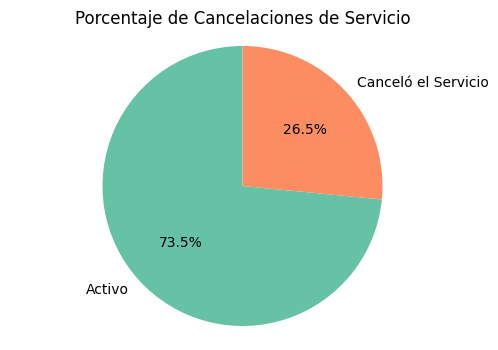

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calcular los porcentajes de cada categoría en 'Evade_Servicio'
churn_counts = data_normalizada['Evade_Servicio'].value_counts(normalize=True) * 100

# Mapear las etiquetas booleanas a las nuevas etiquetas de texto
labels = churn_counts.index.map({False: 'Activo', True: 'Canceló el Servicio'})
sizes = churn_counts.values

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(6, 4))

# Crear el gráfico de torta
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2', len(labels)))

# Añadir título
ax.set_title('Porcentaje de Cancelaciones de Servicio')

# Asegurar que el gráfico sea un círculo
ax.axis('equal')

# Mostrar el gráfico
plt.show()


# Análisis de Cancelaciones: Factores Clave y Oportunidades de Mejora


### Estimado equipo,

#### Se ha realizado un análisis minucioso de la Base de Datos suministrada, estableciendo como eje principal de análisis del parámetro "Churn" o índice de Cancelaciones de los servicios, eliminando primeramente todas las filas que no contenían valores válidos (True/False). Seguidamente se hizo la comparación con todos los campos, discriminandoen dos sectores: aquellos que han cancelado y aquellos que no, para identificar patrones. Y finalmente se tomó al grupo que sí canceló el servicio y se establecieron sus características.  De acuerdo con nuestro análisis integral de los datos, hemos identificado que la tasa general de cancelación de servicios se sitúa en 26.5%, un indicador que refleja oportunidades importantes para mejorar la retención de clientes.

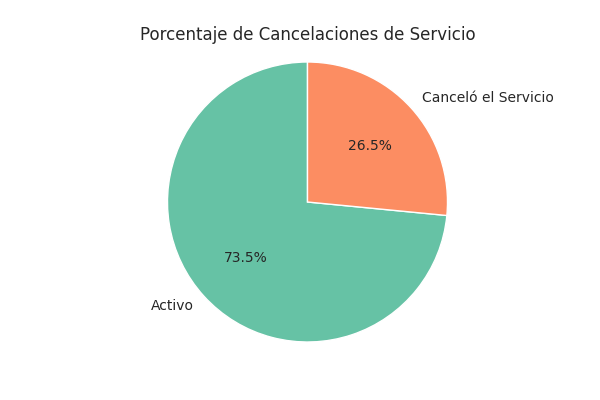



#### Sin embargo, este porcentaje aumenta significativamente en ciertos segmentos y bajo condiciones específicas, lo que nos permite focalizar las acciones correctivas:


##Hallazgos Críticos:

###Perfil Demográfico de Riesgo:

#### Los adultos mayores presentan una tasa de cancelación del 41.7%, casi el doble del promedio general. Esto sugiere que los servicios o la atención actual podrían no estar adaptados a sus necesidades específicas.

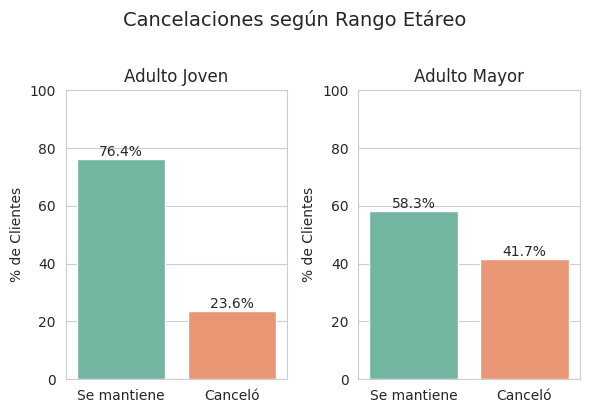

### Tipo de Servicio Contratado:

#### Los clientes con fibra óptica cancelan en un 41.9%, lo que podría indicar expectativas no cumplidas (velocidad, estabilidad) o falta de claridad en las condiciones del servicio.



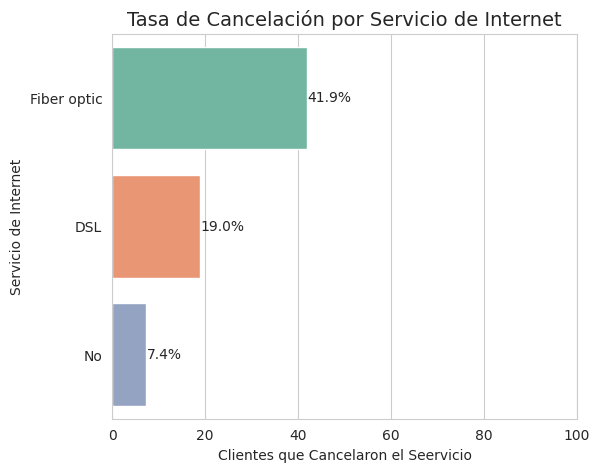

### Servicios Adicionales No Contratados:

#### La cancelación alcanza 41.8% entre quienes no cuentan con:

#### -Seguridad en línea.
#### -Respaldo en Linea.
#### -Protección de dispositivos.
#### -Soporte técnico.

#### Esto refleja que la falta de valor percibido en servicios complementarios impacta directamente en la lealtad del cliente.

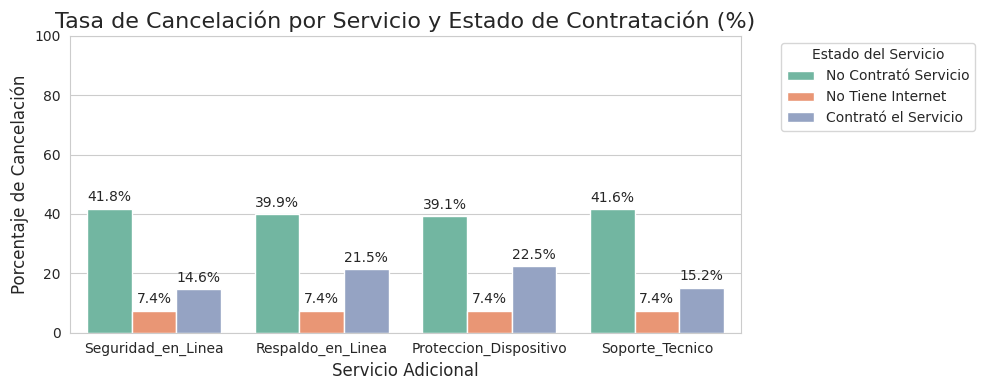




### Modalidad de Contrato y Facturación:

####Contratos mes a mes: 42.7% de cancelación, señalando alta volatilidad en clientes sin compromisos a largo plazo.

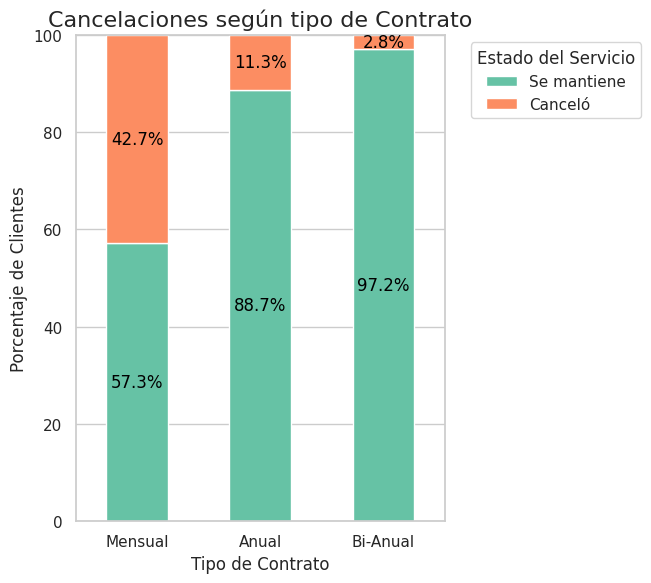

#### Pago con cheque electrónico: 45% (la tasa más alta), posiblemente vinculado a inconvenientes en el proceso de pago o falta de beneficios asociados.

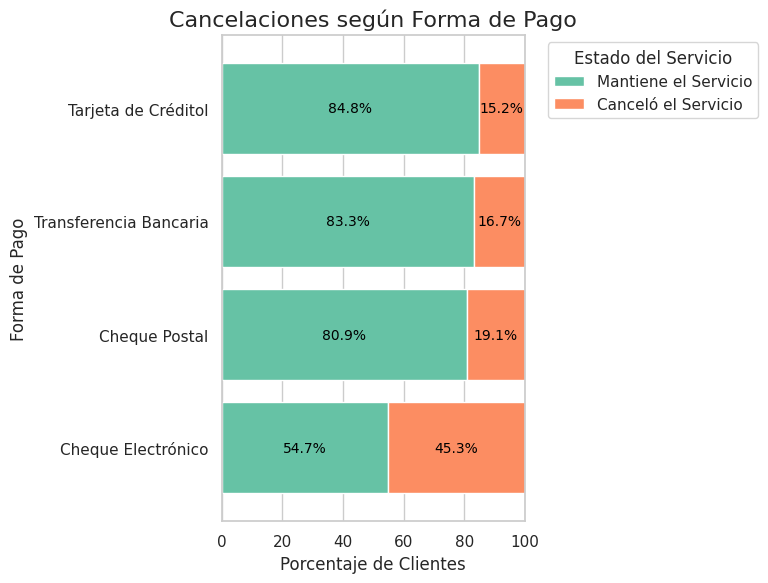

#### Factura en línea: 33%, un 7% arriba del promedio, lo que sugiere que la experiencia digital podría optimizarse.

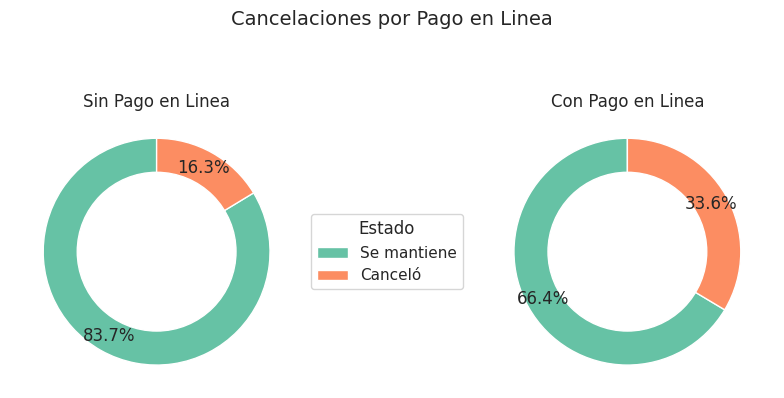

### Cancelaciones por Cuentas Diarias:

#### Se denota que a medida que la facturación diaria del cliente aumenta, también se incrementa el porcentaje de cancelaciones del servicio.

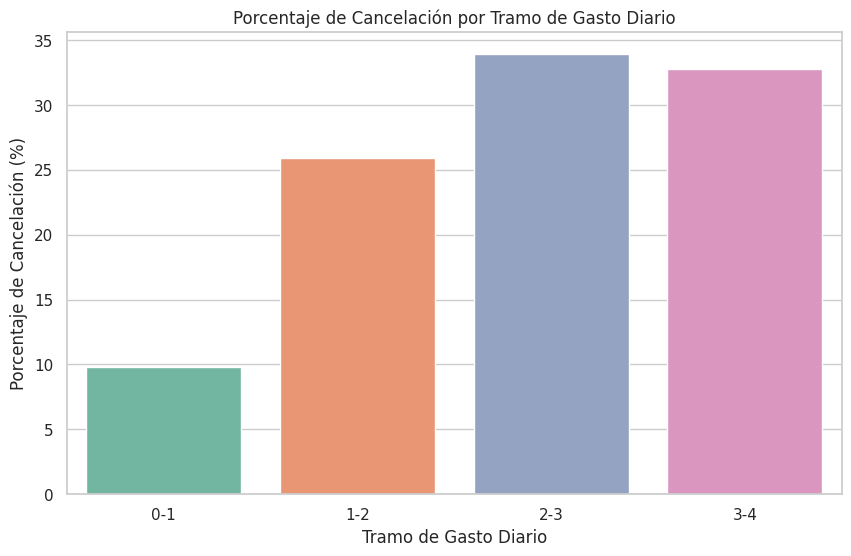

### Recomendaciones Estratégicas:
#### Personalización para adultos mayores: Implementar programas de acompañamiento técnico y ofertas adaptadas.

### Reforzar la propuesta de valor de la fibra óptica:
#### Transparencia en velocidades garantizadas y soporte prioritario.

### Paquetes integrados:
#### Promover servicios adicionales (seguridad, respaldo) como diferenciales para reducir cancelaciones.

### Incentivos por contratos anuales:
#### Descuentos o beneficios exclusivos para clientes con compromisos a largo plazo.

### Optimización de pagos electrónicos:
#### Simplificar procesos y comunicar ventajas de otros métodos (ej: domiciliación bancaria).

### Revisión de tarifas:
#### Se sugiere la implementación de "Promociones" para clientes que tienen consumos más elevados, para obtener así una mayor fidelización de los mismos.

### Estos insights no solo explican las causas subyacentes de las cancelaciones, sino que también delinean acciones concretas para reducir las cancelaciones de servicios y fortalecer la lealtad del cliente.

#### Quedamos atentos para profundizar en cada área según sus prioridades.

#### Equipo de Análisis de Datos

